# **Demand Forescating**

In [26]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

color = sns.color_palette()
sns.set_style('darkgrid')
import ptitprince as pt
###################################
#Time Series
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm 


import warnings
warnings.filterwarnings('ignore')

In [27]:
train='train.csv'
test='test (1).csv'
train=pd.read_csv(train,sep=',')
test=pd.read_csv(test,sep=',')

In [28]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 913000 entries, 0 to 912999
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   date    913000 non-null  object
 1   store   913000 non-null  int64 
 2   item    913000 non-null  int64 
 3   sales   913000 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 27.9+ MB


In [29]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      45000 non-null  int64 
 1   date    45000 non-null  object
 2   store   45000 non-null  int64 
 3   item    45000 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.4+ MB


In [30]:
train['date']=pd.to_datetime(train['date'],format="%Y-%m-%d")
test['date']=pd.to_datetime(test['date'],format='%Y-%m-%d')
print(train.info())
print('--------------------------------------')
print('--------------------------------------')
print(test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 913000 entries, 0 to 912999
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   date    913000 non-null  datetime64[ns]
 1   store   913000 non-null  int64         
 2   item    913000 non-null  int64         
 3   sales   913000 non-null  int64         
dtypes: datetime64[ns](1), int64(3)
memory usage: 27.9 MB
None
--------------------------------------
--------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   id      45000 non-null  int64         
 1   date    45000 non-null  datetime64[ns]
 2   store   45000 non-null  int64         
 3   item    45000 non-null  int64         
dtypes: datetime64[ns](1), int64(3)
memory usage: 1.4 MB
None


In [31]:
train_df = train[train['store']==1]
train_df = train_df[train['item']==1]
train_df['year'] = train['date'].dt.year
train_df['month'] = train['date'].dt.month
train_df['day'] = train['date'].dt.dayofyear
train_df['weekday'] = train['date'].dt.weekday
train_df.head()

,date,store,item,sales,year,month,day,weekday
0,2013-01-01,1,1,13,2013,1,1,1
1,2013-01-02,1,1,11,2013,1,2,2
2,2013-01-03,1,1,14,2013,1,3,3
3,2013-01-04,1,1,13,2013,1,4,4
4,2013-01-05,1,1,10,2013,1,5,5


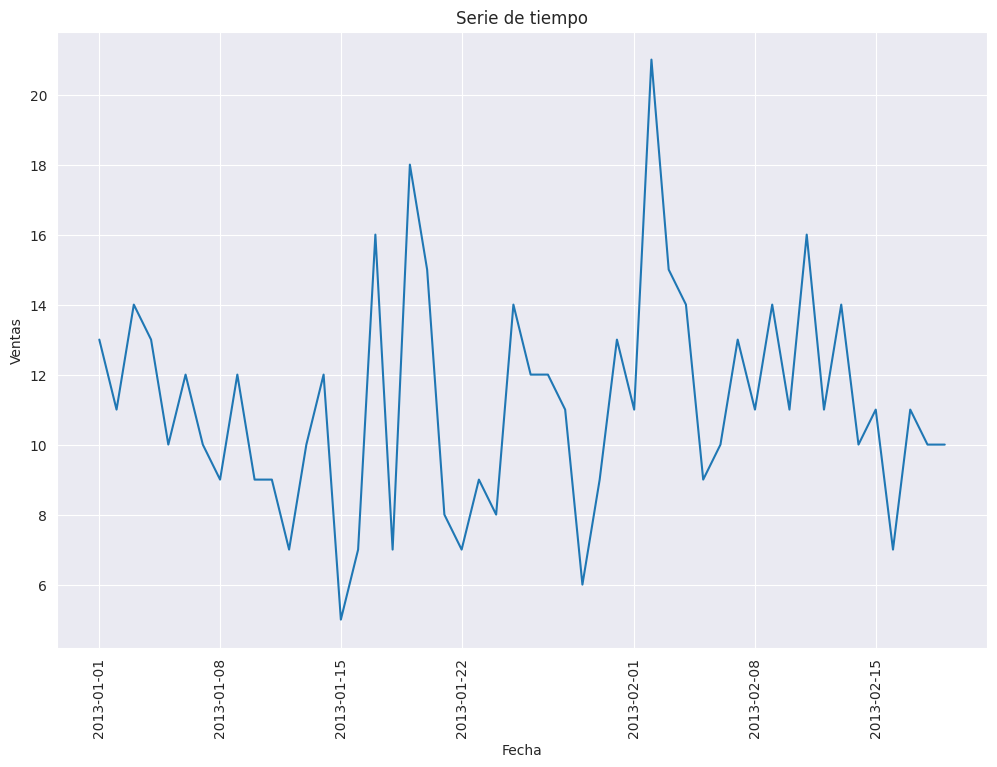

In [32]:
plt.figure(figsize=(12,8))
sns.lineplot(data=train_df[:50],x='date',y='sales')
plt.title('Serie de tiempo')
plt.ylabel('Ventas')
plt.xlabel('Fecha')
plt.xticks(rotation='vertical')
plt.show()

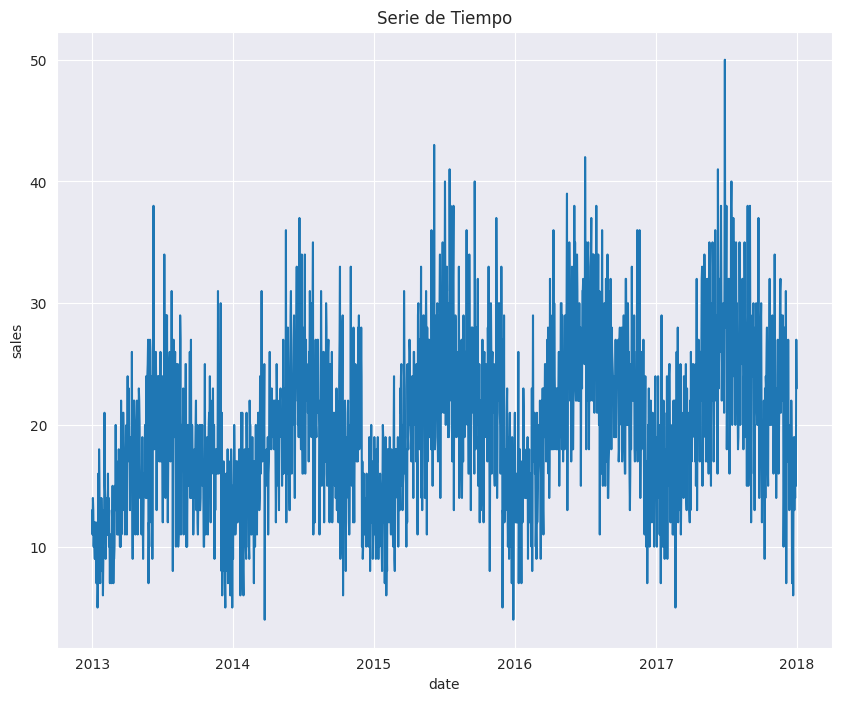

In [33]:
plt.figure(figsize=(10,8))
sns.lineplot(data=train_df,x='date',y='sales')
plt.title('Serie de Tiempo')
plt.show()

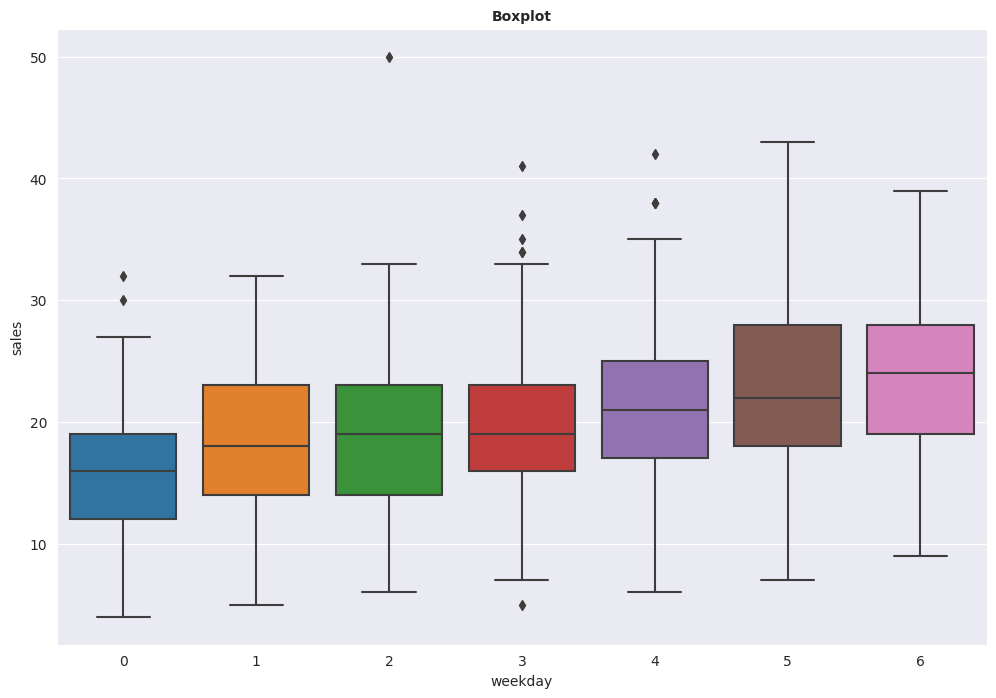

In [34]:
plt.figure(figsize=(12,8))
sns.boxplot(data=train_df,x='weekday',y='sales')
plt.title('Boxplot',fontsize=10,weight='bold')
plt.show()

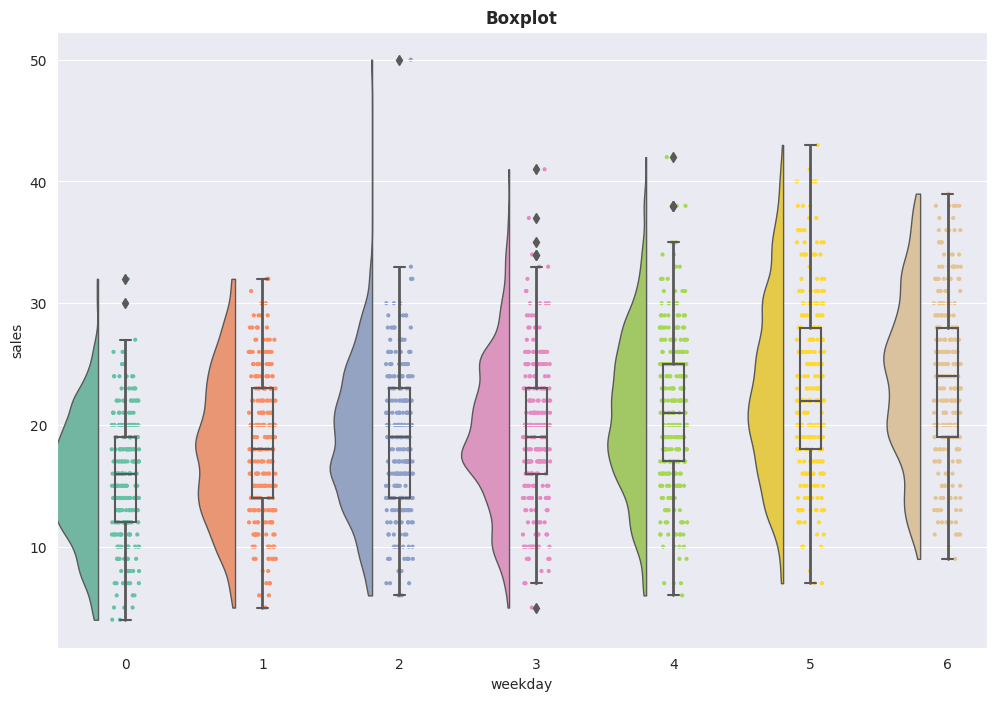

In [35]:
np.bool = np.bool_ #ejecutar el codigo para evitar los errores
f, ax = plt.subplots(figsize=(12, 8))
ax=pt.RainCloud(x="weekday",y="sales",data=train_df)
plt.title('Boxplot',fontsize=12,weight='bold')
plt.show()

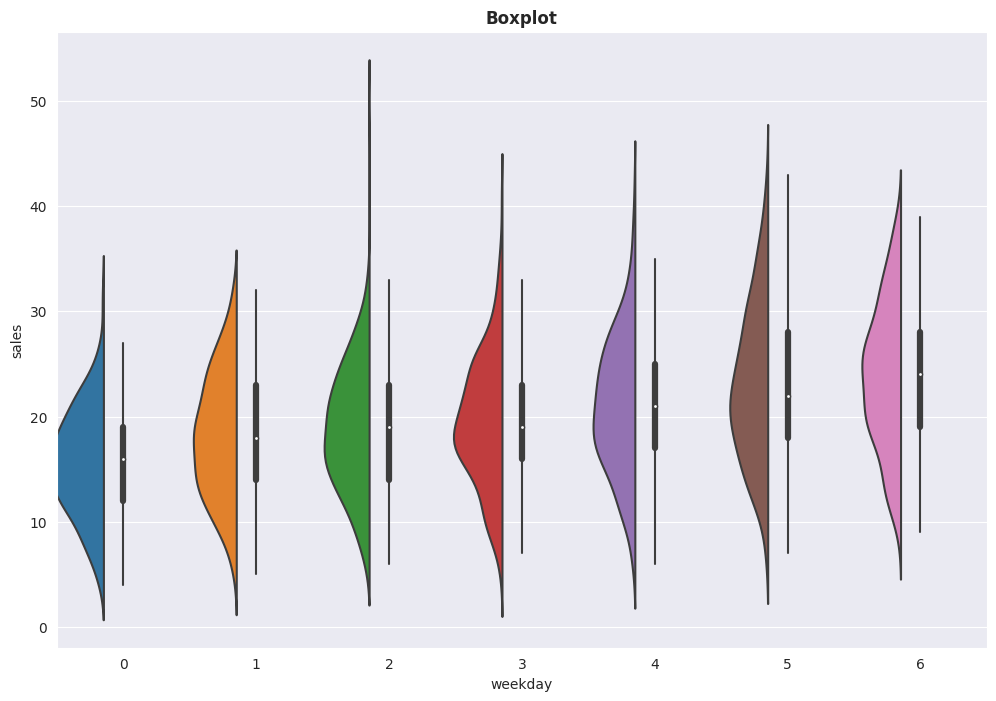

In [36]:
f, ax = plt.subplots(figsize=(12, 8))
ax=pt.half_violinplot(x="weekday",y="sales",data=train_df)
plt.title('Boxplot',fontsize=12,weight='bold')
plt.show()

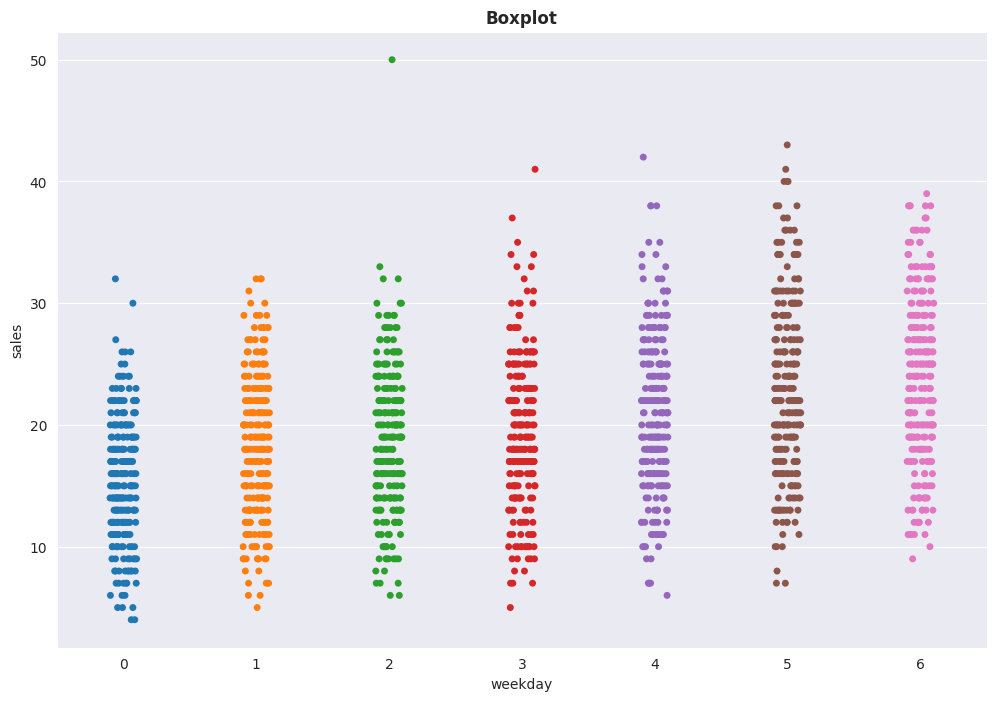

In [37]:
f, ax = plt.subplots(figsize=(12, 8))
ax=sns.stripplot(x="weekday",y="sales",data=train_df)
plt.title('Boxplot',fontsize=12,weight='bold')
plt.show()

In [38]:
train_df = train_df.set_index('date')
train_df['sales'] = train_df['sales'].astype(float)

train_df.head()

,store,item,sales,year,month,day,weekday
date,,,,,,,
2013-01-01,1,1,13.0,2013,1,1,1
2013-01-02,1,1,11.0,2013,1,2,2
2013-01-03,1,1,14.0,2013,1,3,3
2013-01-04,1,1,13.0,2013,1,4,4
2013-01-05,1,1,10.0,2013,1,5,5


# Time Series Analysis

<Figure size 1200x1000 with 0 Axes>

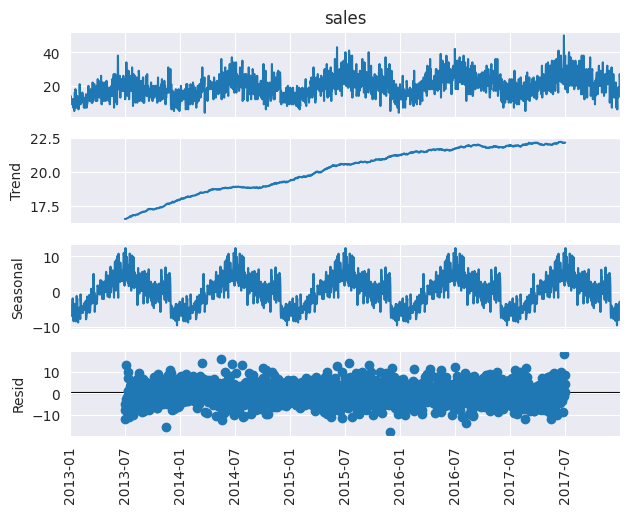

In [39]:
# Utiliza 'period' en lugar de 'freq'
result = seasonal_decompose(train_df['sales'], model='additive', period=365)

# Resto del código
plt.figure(figsize=(12,10))
result.plot()
plt.xticks(rotation='vertical')
plt.show()


In [40]:
def test_stationarity(timeseries, window=12, cutoff=0.01):
    """
    Test the stationarity of a time series using the Dickey-Fuller test.
    
    Parameters:
        timeseries (pd.Series): The time series to be tested.
        window (int): Rolling window size for moving averages (default: 12).
        cutoff (float): The significance level for the p-value (default: 0.01).
    """
    # Calculate rolling statistics
    rolmean = timeseries.rolling(window=window).mean()
    rolstd = timeseries.rolling(window=window).std()

    # Plot rolling statistics
    fig, ax = plt.subplots(figsize=(12, 8))
    ax.plot(timeseries, color='blue', label='Original')
    ax.plot(rolmean, color='red', label='Rolling Mean')
    ax.plot(rolstd, color='black', label='Rolling Std')
    ax.legend(loc='best')
    ax.set_title('Rolling Mean & Standard Deviation')
    plt.show()

    # Perform Dickey-Fuller test
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC', maxlag=20)
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    
    # Print critical values
    for key, value in dftest[4].items():
        dfoutput[f'Critical Value ({key})'] = value
    
    pvalue = dftest[1]
    if pvalue < cutoff:
        print(f'p-value = {pvalue:.4f}. The series is likely stationary.')
    else:
        print(f'p-value = {pvalue:.4f}. The series is likely non-stationary.')
    
    print(dfoutput)

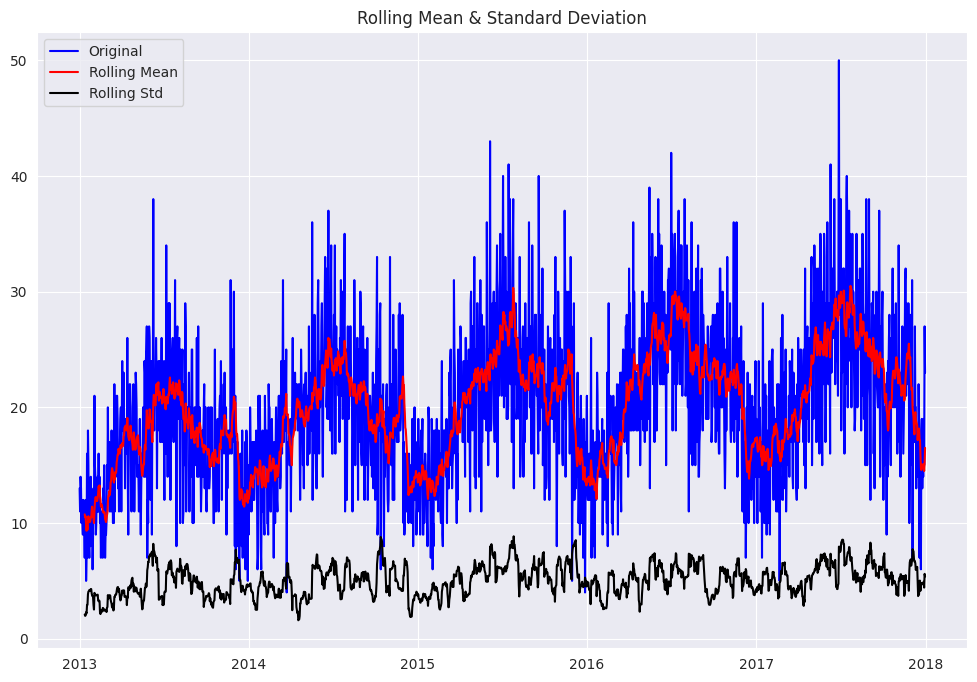

Results of Dickey-Fuller Test:
p-value = 0.0361. The series is likely non-stationary.
Test Statistic                   -2.987278
p-value                           0.036100
#Lags Used                       20.000000
Number of Observations Used    1805.000000
Critical Value (1%)              -3.433978
Critical Value (5%)              -2.863143
Critical Value (10%)             -2.567623
dtype: float64


In [41]:
test_stationarity(train_df['sales'])

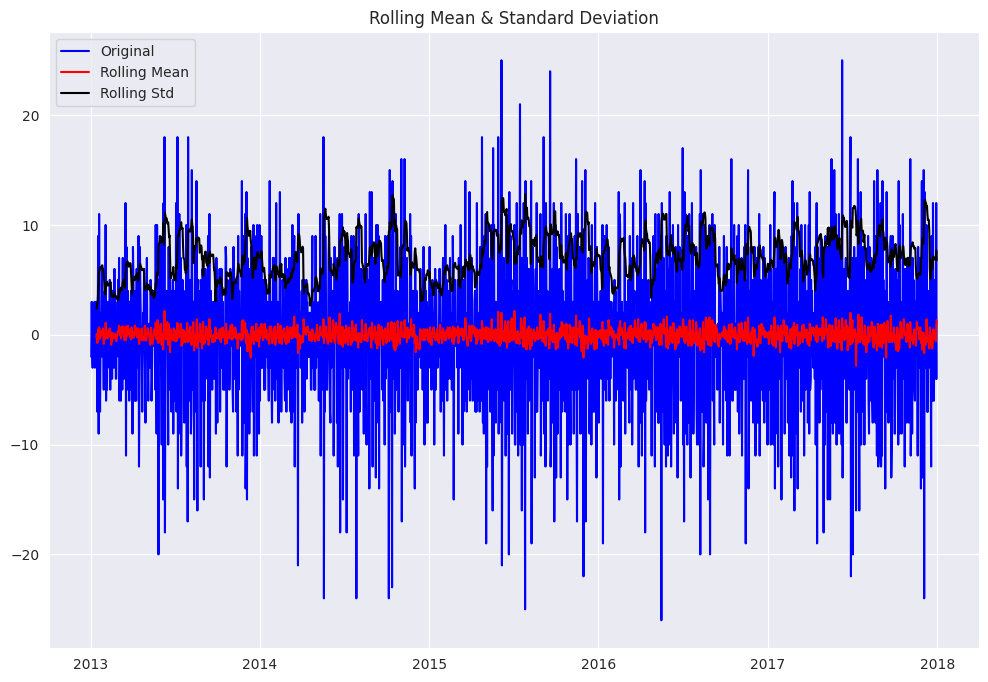

Results of Dickey-Fuller Test:
p-value = 0.0000. The series is likely stationary.
Test Statistic                -1.520810e+01
p-value                        5.705031e-28
#Lags Used                     2.000000e+01
Number of Observations Used    1.804000e+03
Critical Value (1%)           -3.433980e+00
Critical Value (5%)           -2.863143e+00
Critical Value (10%)          -2.567624e+00
dtype: float64


In [42]:
first_diff = train_df.sales - train_df.sales.shift(1)
first_diff = first_diff.dropna(inplace = False)
test_stationarity(first_diff,window=12)

## **ACF AND PACF**

In [43]:
def acf_pacf(train_df,dato,num):
    fig = plt.figure(figsize=(12,8))
    ax1 = fig.add_subplot(211)
    fig = sm.graphics.tsa.plot_acf(train_df[dato], lags=num, ax=ax1) # 
    ax2 = fig.add_subplot(212)
    fig = sm.graphics.tsa.plot_pacf(train_df[dato], lags=num, ax=ax2)

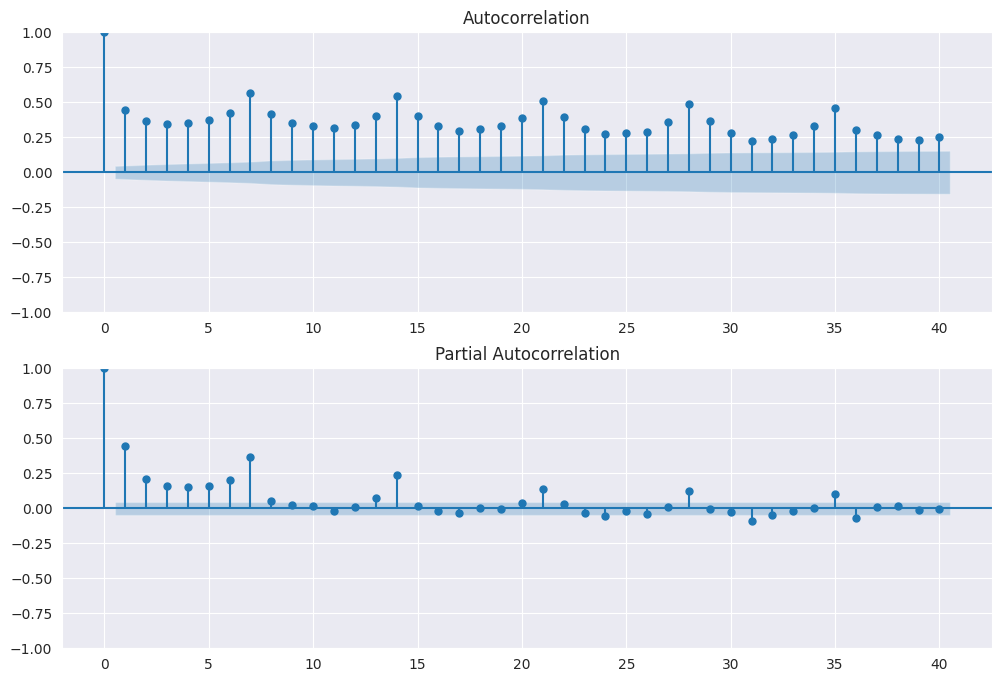

In [44]:
acf_pacf(train_df,'sales',40)

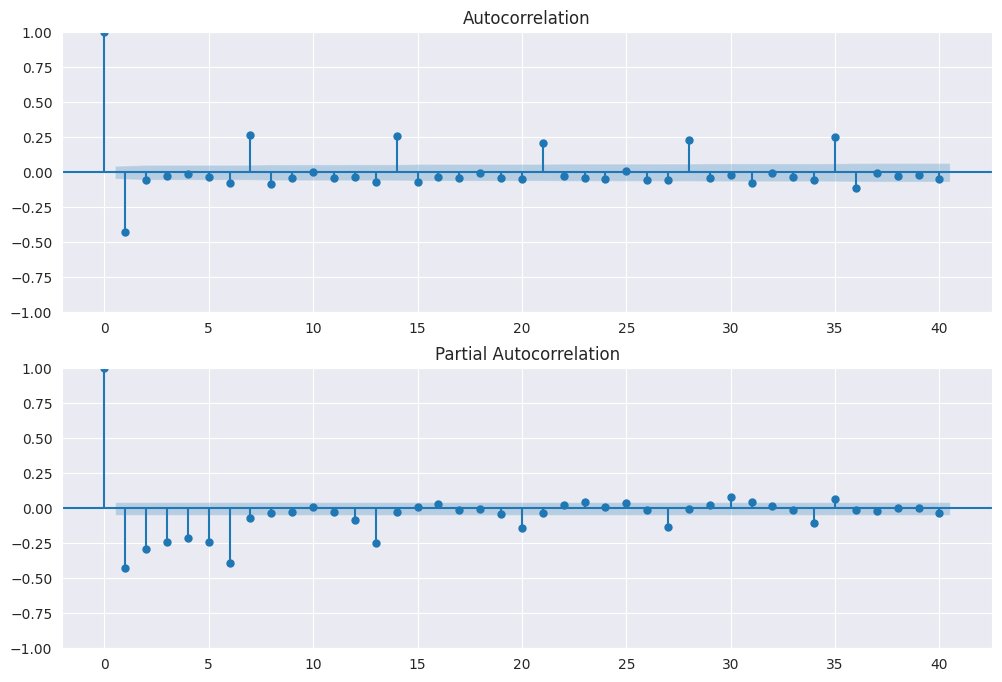

In [45]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(first_diff, lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(first_diff, lags=40, ax=ax2)

## **Buil the Model**

In [46]:
train_df.head()

,store,item,sales,year,month,day,weekday
date,,,,,,,
2013-01-01,1,1,13.0,2013,1,1,1
2013-01-02,1,1,11.0,2013,1,2,2
2013-01-03,1,1,14.0,2013,1,3,3
2013-01-04,1,1,13.0,2013,1,4,4
2013-01-05,1,1,10.0,2013,1,5,5


In [47]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 913000 entries, 0 to 912999
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   date    913000 non-null  datetime64[ns]
 1   store   913000 non-null  int64         
 2   item    913000 non-null  int64         
 3   sales   913000 non-null  int64         
dtypes: datetime64[ns](1), int64(3)
memory usage: 27.9 MB


In [48]:

# Asegúrate de que 'train_df.sales' sea una serie temporal válida con el mismo número de observaciones que 'train_df'
arima_mod6 = sm.tsa.ARIMA(train_df.sales, order=(6, 1, 0)).fit()
print(arima_mod6.summary())

                               SARIMAX Results                                
Dep. Variable:                  sales   No. Observations:                 1826
Model:                 ARIMA(6, 1, 0)   Log Likelihood               -5597.679
Date:                Thu, 07 Sep 2023   AIC                          11209.359
Time:                        18:26:59   BIC                          11247.924
Sample:                    01-01-2013   HQIC                         11223.585
                         - 12-31-2017                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8174      0.021    -39.063      0.000      -0.858      -0.776
ar.L2         -0.7497      0.025    -30.480      0.000      -0.798      -0.702
ar.L3         -0.6900      0.026    -26.686      0.0

In [49]:
sarima_mod6 = sm.tsa.statespace.SARIMAX(train_df.sales, trend='n', order=(6,1,0)).fit()
print(sarima_mod6.summary())

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.06554D+00    |proj g|=  1.07217D-03

At iterate    5    f=  3.06554D+00    |proj g|=  4.01387D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7      9     11      1     0     0   2.516D-06   3.066D+00
  F =   3.0655417598960892     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
                               SARIMAX Results                                
Dep. Variable:                  sales   No. Observati